# Feature Engineering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set_style('white')

In [2]:
df = pd.read_csv('dataset/convincing_data.csv')

## Heatmap

In [3]:
df['time'] = df['created_utc']

Text(0.5, 1.0, 'Heatmap of correlation matrix')

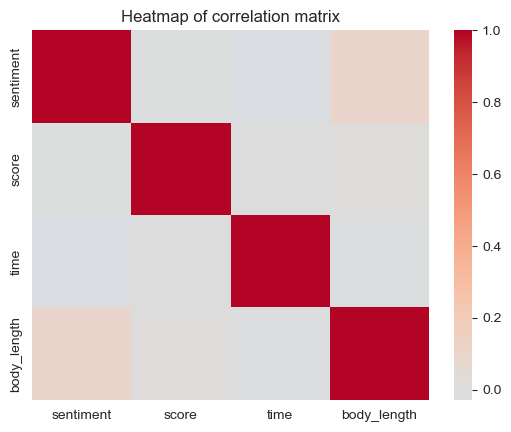

In [4]:
sns.heatmap(df[['sentiment', 'score', 'time', 'body_length']].corr(), cmap='coolwarm', center=0)
plt.title('Heatmap of correlation matrix')
# plt.savefig('eda_Heatmap.pdf', dpi=300, bbox_inches='tight')

## Nunique of subreddit

In [5]:
df['subreddit.name'].nunique()

10612

## Body length

Text(0.5, 1.0, 'Correlation between body length and sentiment')

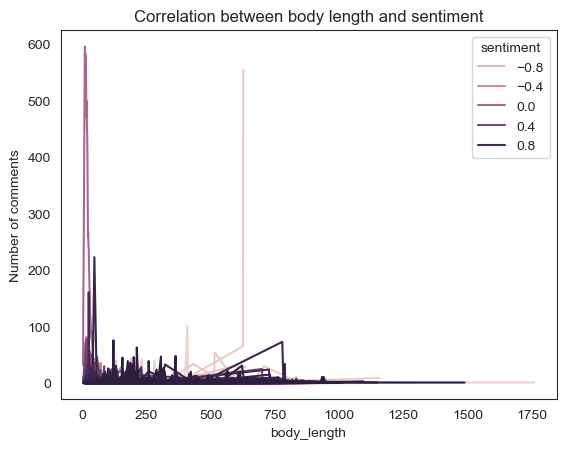

In [6]:
counts_df = df.groupby([pd.Grouper(key='body_length'), 'sentiment']).size().reset_index(name='count')
sns.lineplot(x='body_length', y='count', hue='sentiment', data=counts_df)
plt.xlabel('body_length')
plt.ylabel('Number of comments')
plt.title("Correlation between body length and sentiment")
# plt.savefig('eda_Body length.pdf', dpi=300, bbox_inches='tight')

## Time

Text(0.5, 1.0, 'Correlation between time and sentiment')

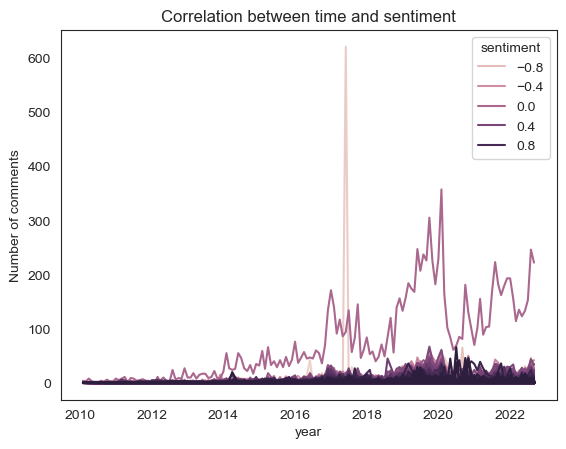

In [7]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
counts_df = df.groupby([pd.Grouper(key='created_utc', freq='M'), 'sentiment']).size().reset_index(name='count')
sns.lineplot(x='created_utc', y='count', hue='sentiment', data=counts_df)
plt.xlabel('year')
plt.ylabel('Number of comments')
plt.title("Correlation between time and sentiment")
# plt.savefig('eda_Time.pdf', dpi=300, bbox_inches='tight')